# **Task 3: Customer Segmentation / Clustering**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score


##computing KMeans Clustering

In [13]:
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

## Mergeing transaction data with customer profiles

In [14]:
df = transactions.merge(customers, on="CustomerID")

## Aggregating transaction data for each customer

In [15]:
customer_data = df.groupby("CustomerID").agg({
    "TotalValue": "sum",   # Total amount spent
    "Quantity": "sum",      # Total quantity of products purchased
}).reset_index()

In [16]:
customer_data = customer_data.merge(customers, on="CustomerID")
customer_data["Region"] = customer_data["Region"].astype("category").cat.codes

## feature selection for clustering

In [17]:
features = customer_data[["TotalValue", "Quantity", "Region"]]

##Data normalization

In [18]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## Elbow Method to find optimal number

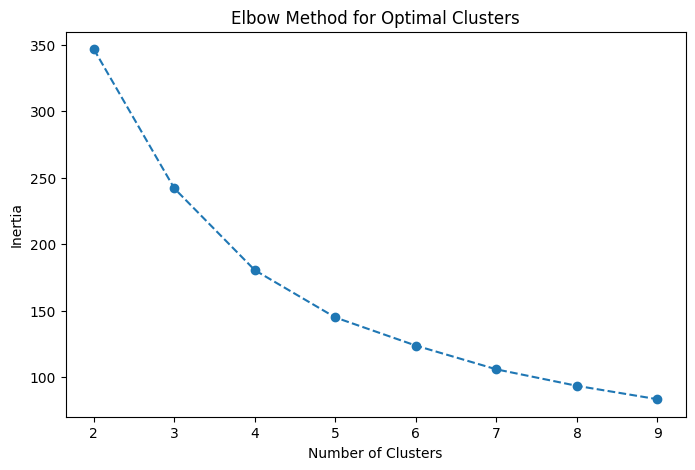

In [19]:
inertia = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

##KMeans Clustering

In [21]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
customer_data["Cluster"] = kmeans.fit_predict(scaled_features)
db_index = davies_bouldin_score(scaled_features, customer_data["Cluster"])
silhouette_avg = silhouette_score(scaled_features, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.9374134192263026
Silhouette Score: 0.395305441043594


##Cluster Visiualisation

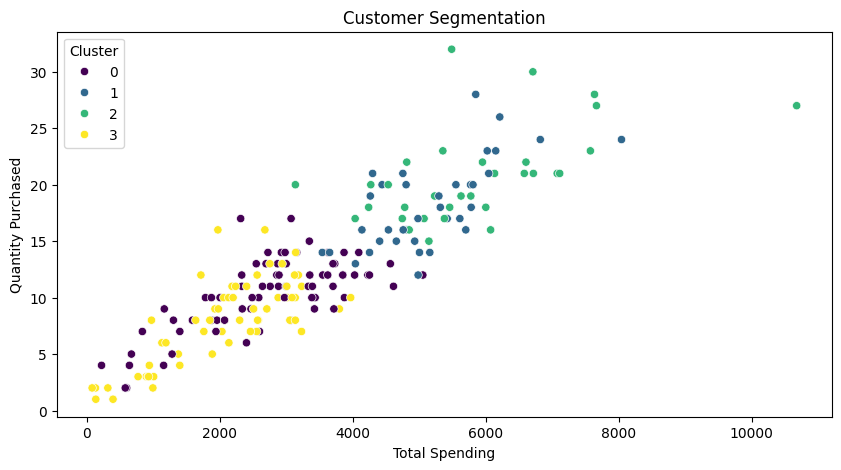

In [22]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_data["TotalValue"], y=customer_data["Quantity"], hue=customer_data["Cluster"], palette="viridis")
plt.title("Customer Segmentation")
plt.xlabel("Total Spending")
plt.ylabel("Quantity Purchased")
plt.legend(title="Cluster")
plt.show()